# **Traditional Models**

According to our literature review, we decided to explore a variety of traditional ML algorithms to assist us in our problem.

**Goal:** Find the best hyperparameters and train the following models:
1. Logistic Regression
2. KNN
3. Support Vector Classifier (SVC)
4. Decision Trees
5. Random Forest

6. XGBoost will be done separately at the end, since it requires custom data loading which is a different process that the other models.

### Imports

In [1]:
import joblib

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Metrics
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

In [4]:
# Tools
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [ ]:
TRAIN_PATH = 'data/train_data.csv'
TEST_PATH = 'data/test_data.csv'

In [9]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

### Retrieve Target Variable from .csv File

In [10]:
X_train = train.drop(columns=['isFraud'], axis=1)
y_train = train['isFraud']

In [11]:
X_test = test.drop(columns=['isFraud'], axis=1)
y_test = test['isFraud']

### Sample 5% of Training Data (Dataset is too large)

In [12]:
X_train, X_unused, y_train, y_unused = train_test_split(X_train, y_train, test_size=0.95, stratify=y_train, random_state=777)

### Calculate Class Weights

In [13]:

class_counts = test['isFraud'].value_counts()
total_count = class_counts.sum()

# Calculate inverse weight (total count / class count)
weights = []
for i in range(2):
    weights.append(total_count/class_counts.loc[i])

# Get the total weight
total = pd.DataFrame(weights).sum()

# Create the class weighting dictionary
class_weighting = {}
for i in range(2):
    class_weighting[i] = weights[i]/total

print ( class_weighting )

{0: 0    0.001291
dtype: float64, 1: 0    0.998709
dtype: float64}


### Define Models and Hyperparameter Search Range

In [14]:
models = {


    "Logistic Regression": {
        "instance": LogisticRegression(penalty='l2',
                                       solver='lbfgs',
                                       class_weight=class_weighting
                                       ),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10],
            'max_iter': [100, 200, 300],
            }
        },
        
        "K-Nearest Neighbors": {
        "instance": KNeighborsClassifier(n_jobs=-1),
        "params": {
            "n_neighbors": list(range(5, 50, 2)),
            "weights": ["uniform", "distance"]
            }
        },



    "Random Forest": {
        "instance": RandomForestClassifier(n_jobs=-1,
                                           class_weight=class_weighting),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "max_depth": [None, 10, 20, 30]
            }
        },
    


    "Decision Tree": {
        "instance": DecisionTreeClassifier(class_weight=class_weighting),
        "params": {
            "max_depth": [10, 20, 30, 40],
            "min_samples_split": [2, 5, 10]
            }
        }

    }

### Perform Grid Search
Find the best parameters for each of the five models and then save best model info, like estimator, params, and score to a file for later use.

In [ ]:

for model_name, model_info in models.items():

        # Set up grid search
        grid_search = GridSearchCV(estimator=model_info['instance'],
                                   param_grid=model_info['params'],
                                   verbose=2,
                                   n_jobs=-1,
                                   cv=5
                                   )

        # Fit search to training data
        grid_search.fit(X_train, y_train)

        # Retrieve the best scores and params
        model_data = {
        'best estimator': grid_search.best_estimator_,
        'best params': grid_search.best_params_,
        'best score': grid_search.best_score_
       }
        
        joblib.dump(model_data, 'models/' + model_name + '.pkl')
        





Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.

[CV] END ..............................C=0.001, max_iter=100; total time=  20.1s
[CV] END ..............................C=0.001, max_iter=100; total time=  20.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

[CV] END ..............................C=0.001, max_iter=100; total time=  21.7s
[CV] END ..............................C=0.001, max_iter=100; total time=  21.9s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weigh

[CV] END ..............................C=0.001, max_iter=100; total time=  22.3s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..............................C=0.001, max_iter=200; total time=  24.4s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_log

[CV] END ..............................C=0.001, max_iter=200; total time=  32.0s
[CV] END ..............................C=0.001, max_iter=200; total time=  32.1s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..............................C=0.001, max_iter=200; total time=  19.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..............................C=0.001, max_iter=300; total time=  19.0s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, max_iter=100; total time=  14.1s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................C=0.001, max_iter=200; total time=  26.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..............................C=0.001, max_iter=300; total time=  19.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..............................C=0.001, max_iter=300; total time=  32.4s
[CV] END ...............................C=0.01, max_iter=100; total time=  13.3s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

[CV] END ...............................C=0.01, max_iter=100; total time=  14.9s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.

[CV] END ..............................C=0.001, max_iter=300; total time=  38.0s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, max_iter=100; total time=  14.9s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weigh

[CV] END ..............................C=0.001, max_iter=300; total time=  37.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, max_iter=100; total time=  15.0s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END ...............................C=0.01, max_iter=200; total time=  25.9s
[CV] END ...............................C=0.01, max_iter=200; total time=  22.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END ...............................C=0.01, max_iter=200; total time=  26.5s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, max_iter=200; total time=  30.7s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ...............................C=0.01, max_iter=200; total time=  27.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ...............................C=0.01, max_iter=300; total time=  31.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, max_iter=100; total time=  17.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ...............................C=0.01, max_iter=300; total time=  25.6s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, max_iter=300; total time=  43.3s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, max_iter=100; total time=  18.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, max_iter=100; total time=  16.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ...............................C=0.01, max_iter=300; total time=  28.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END ...............................C=0.01, max_iter=300; total time=  45.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END ................................C=0.1, max_iter=100; total time=  19.9s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, max_iter=100; total time=  18.3s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ................................C=0.1, max_iter=200; total time=  26.2s
[CV] END ................................C=0.1, max_iter=200; total time=  28.1s
[CV] END ................................C=0.1, max_iter=200; total time=  26.9s
[CV] END ................................C=0.1, max_iter=200; total time=  26.5s
[CV] END ................................C=0.1, max_iter=200; total time=  29.3s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.

[CV] END ................................C=0.1, max_iter=300; total time=  27.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ................................C=0.1, max_iter=300; total time=  25.0s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ................................C=0.1, max_iter=300; total time=  28.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, max_iter=100; total time=  14.7s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, max_iter=100; total time=  15.4s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, max_iter=100; total time=  17.1s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, max_iter=100; total time=  15.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ................................C=0.1, max_iter=300; total time=  22.6s
[CV] END ................................C=0.1, max_iter=300; total time=  23.5s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END ..................................C=1, max_iter=100; total time=  16.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..................................C=1, max_iter=200; total time=  22.1s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..................................C=1, max_iter=200; total time=  22.0s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, max_iter=200; total time=  28.2s
[CV] END ..................................C=1, max_iter=200; total time=  26.1s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..................................C=1, max_iter=300; total time=  21.9s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END ..................................C=1, max_iter=200; total time=  28.9s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..................................C=1, max_iter=300; total time=  23.0s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=10, max_iter=100; total time=  15.0s
[CV] END ..................................C=1, max_iter=300; total time=  26.6s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=10, max_iter=100; total time=  14.9s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END .................................C=10, max_iter=100; total time=  17.7s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_log

[CV] END .................................C=10, max_iter=100; total time=  17.3s
[CV] END .................................C=10, max_iter=100; total time=  16.4s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

[CV] END ..................................C=1, max_iter=300; total time=  43.0s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END ..................................C=1, max_iter=300; total time=  36.8s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END .................................C=10, max_iter=200; total time=  21.3s
[CV] END .................................C=10, max_iter=200; total time=  20.1s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[CV] END .................................C=10, max_iter=200; total time=  22.7s
[CV] END .................................C=10, max_iter=200; total time=  22.4s
[CV] END .................................C=10, max_iter=200; total time=  19.9s
[CV] END .................................C=10, max_iter=300; total time=  19.9s
[CV] END .................................C=10, max_iter=300; total time=  19.7s
[CV] END .................................C=10, max_iter=300; total time=  13.2s
[CV] END .................................C=10, max_iter=300; total time=  11.2s
[CV] END .................................C=10, max_iter=300; total time=  12.2s


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


Fitting 5 folds for each of 46 candidates, totalling 230 fits
[CV] END ....................n_neighbors=5, weights=distance; total time=  17.8s
[CV] END ....................n_neighbors=5, weights=distance; total time=  17.9s
[CV] END ....................n_neighbors=5, weights=distance; total time=  17.9s
[CV] END ....................n_neighbors=5, weights=distance; total time=  10.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=  10.6s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  41.4s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  41.5s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  41.6s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  41.6s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  41.6s
[CV] END .....................n_neighbors=7, weights=uniform; total time=  32.3s
[CV] END ....................n_neighbors=7, wei

/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.

KeyboardInterrupt: 

In [ ]:
results = {}
from sklearn import metrics

for model_name, model_info in models.items():
    print(f"Testing {model_name}...")

    grid_search = GridSearchCV(
        estimator=model_info["instance"],
        param_grid=model_info["params"],
        scoring="accuracy",
        cv=5,
        n_jobs=-1,
        verbose=1,
    )
    

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    

    acc = metrics.accuracy_score(y_test, y_pred)
    report = metrics.classification_report(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        "Best Params": grid_search.best_params_,
        "Accuracy": acc,
        "Classification Report": report,
        "Confusion Matrix": cm,
    }
    print(f"{model_name} completed. Test Accuracy: {acc:.4f}")

for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Best Params: {metrics['Best Params']}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("-" * 80)


Testing Logistic Regression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.

Logistic Regression completed. Test Accuracy: 0.4826
Testing K-Nearest Neighbors...
Fitting 5 folds for each of 46 candidates, totalling 230 fits
K-Nearest Neighbors completed. Test Accuracy: 0.7961
Testing Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.

Random Forest completed. Test Accuracy: 0.9974
Testing Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.12/site-packages/sklearn/utils/class_weight.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]
/Users/admin/Downloads/anaconda/anaconda3/envs/my_environment_A5005da/lib/python3.

Decision Tree completed. Test Accuracy: 0.9944
Model: Logistic Regression
Best Params: {'C': 1, 'max_iter': 300}
Accuracy: 0.4826
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65   1270881
           1       0.00      1.00      0.00      1643

    accuracy                           0.48   1272524
   macro avg       0.50      0.74      0.33   1272524
weighted avg       1.00      0.48      0.65   1272524

Confusion Matrix:
[[612531 658350]
 [     1   1642]]
--------------------------------------------------------------------------------
Model: K-Nearest Neighbors
Best Params: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.7961
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1270881
           1       0.00      0.34      0.00      1643

    accuracy                           0.80   1272524
   macro avg       0.50      0.57      0.45   

In [16]:
# Display results for each model
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Best Params: {metrics['Best Params']}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("-" * 80)

Model: Logistic Regression
Best Params: {'C': 1, 'max_iter': 300}
Accuracy: 0.4826
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65   1270881
           1       0.00      1.00      0.00      1643

    accuracy                           0.48   1272524
   macro avg       0.50      0.74      0.33   1272524
weighted avg       1.00      0.48      0.65   1272524

Confusion Matrix:
[[612531 658350]
 [     1   1642]]
--------------------------------------------------------------------------------
Model: K-Nearest Neighbors
Best Params: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.7961
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1270881
           1       0.00      0.34      0.00      1643

    accuracy                           0.80   1272524
   macro avg       0.50      0.57      0.45   1272524
weighted avg       1.00      0.80      

/var/folders/56/5l7d9_y936d5pw2zt37_51j80000gn/T/ipykernel_18497/514267632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


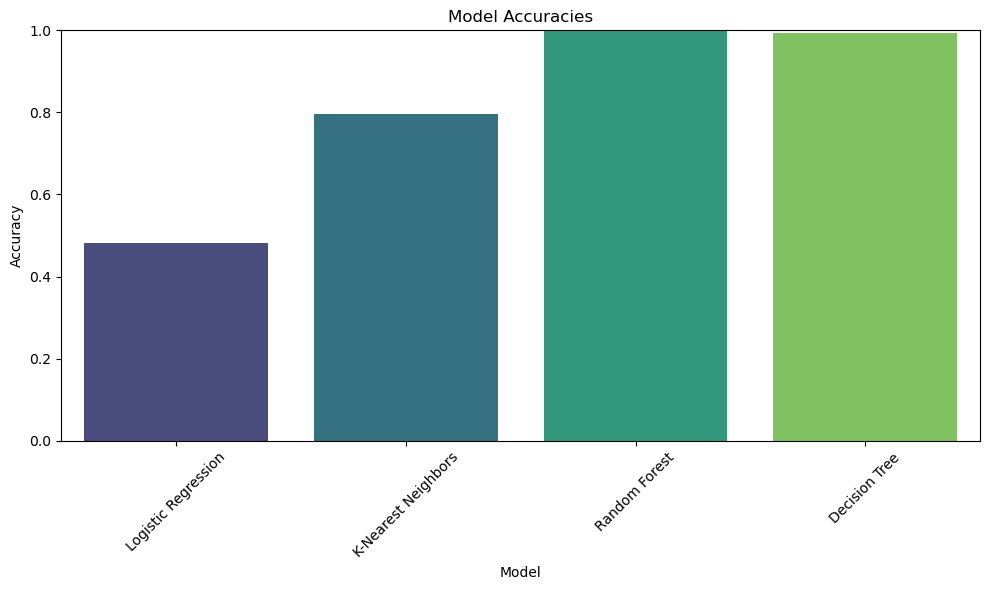

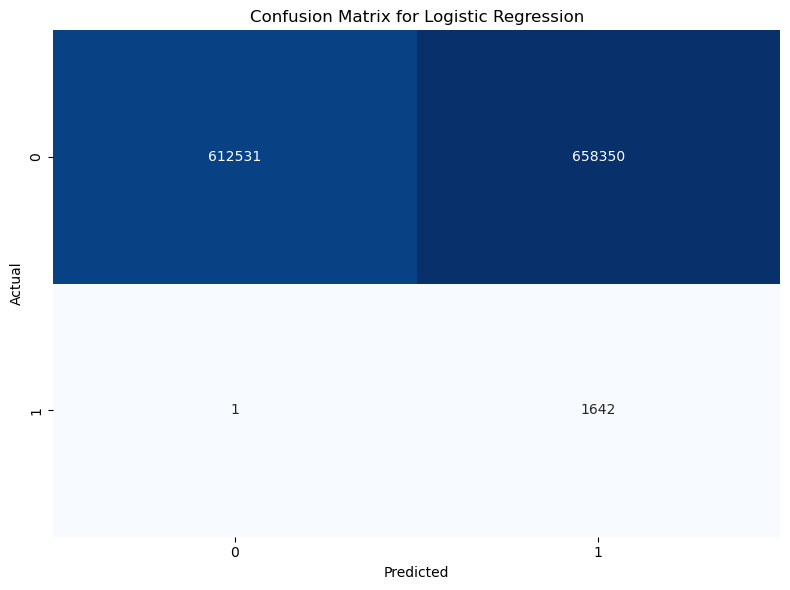

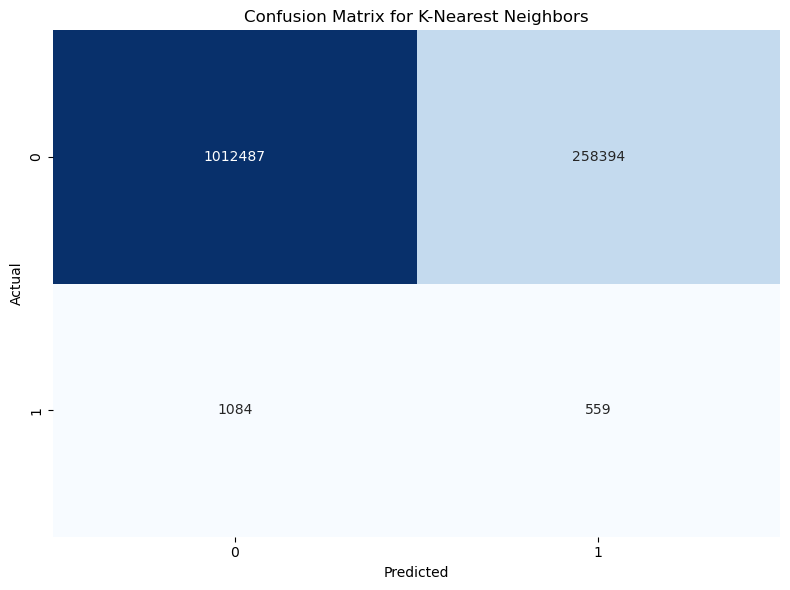

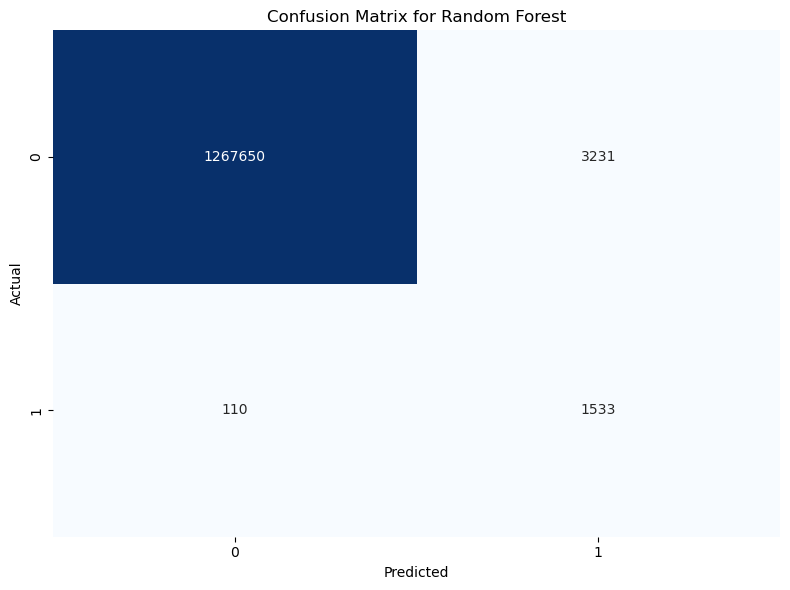

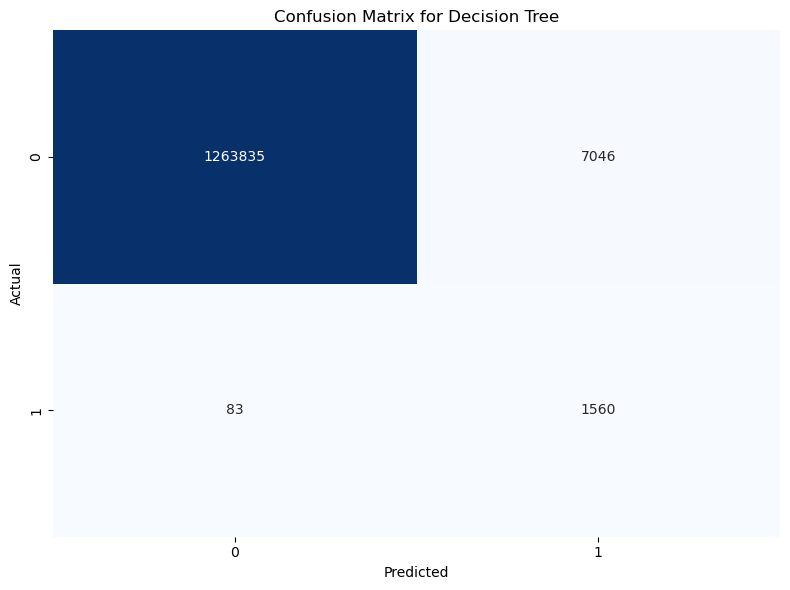

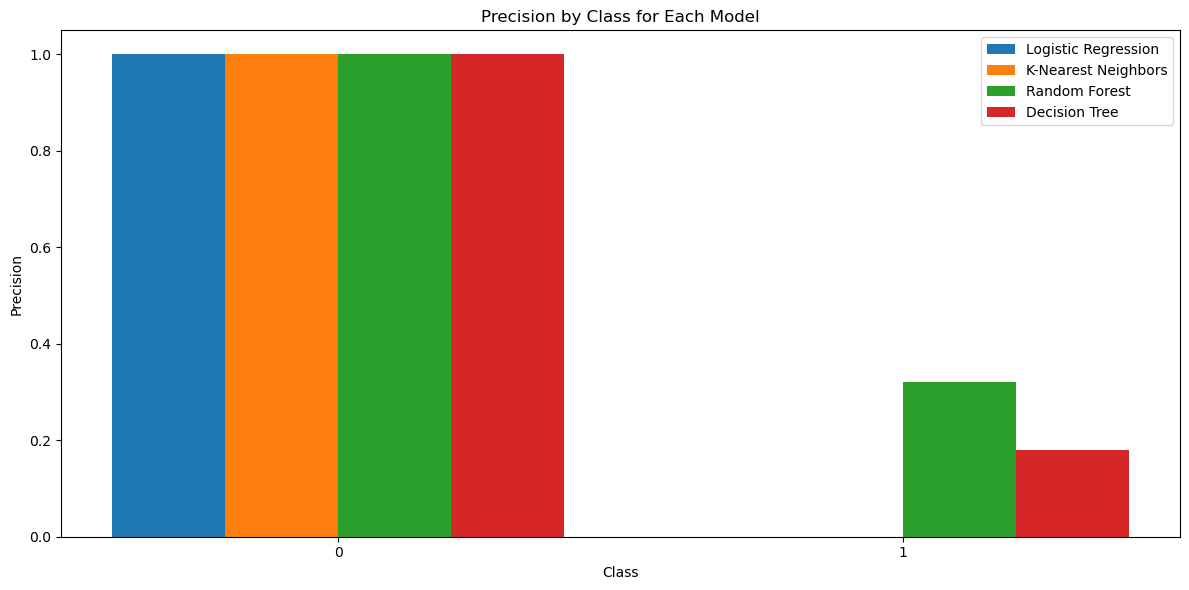

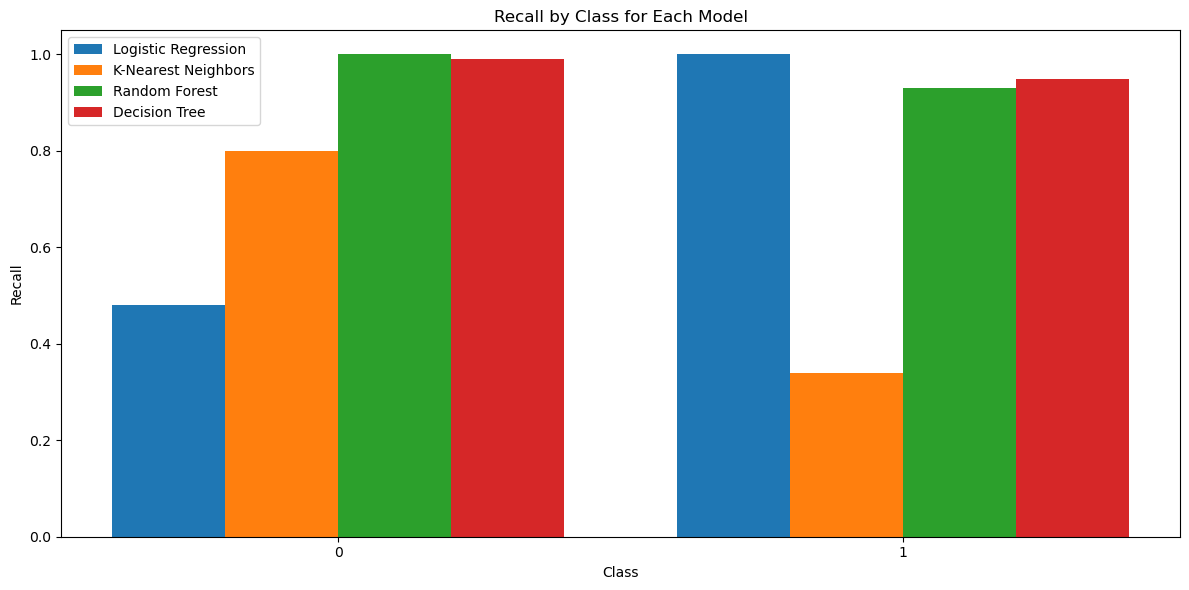

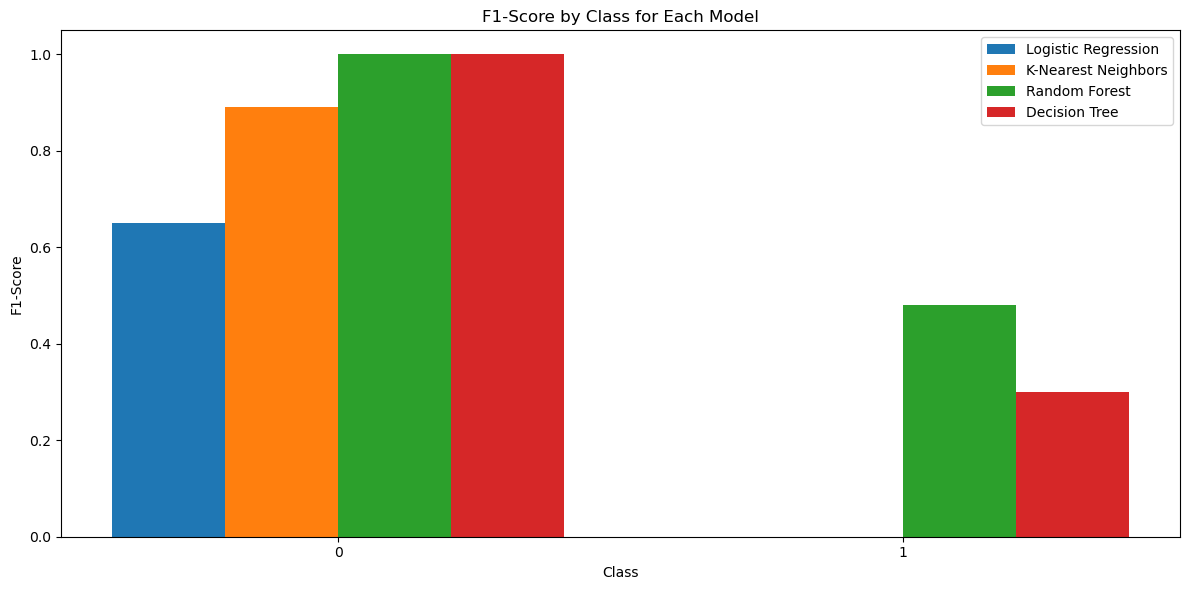

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for model_name, metrics in results.items():
    cm = metrics["Confusion Matrix"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

report_data = {}

for model_name, metrics in results.items():
    report_lines = metrics["Classification Report"].split("\n")
    for line in report_lines[2:-5]:
        row = line.split()
        if len(row) >= 5:
            label = row[0]
            precision, recall, f1_score = map(float, row[1:4])
            if label not in report_data:
                report_data[label] = {"Precision": [], "Recall": [], "F1-Score": []}
            report_data[label]["Precision"].append(precision)
            report_data[label]["Recall"].append(recall)
            report_data[label]["F1-Score"].append(f1_score)

for metric in ["Precision", "Recall", "F1-Score"]:
    plt.figure(figsize=(12, 6))
    index = np.arange(len(report_data))
    bar_width = 0.2

    for i, model_name in enumerate(model_names):
        values = [report_data[label][metric][i] for label in report_data]
        plt.bar(index + i * bar_width, values, bar_width, label=model_name)

    plt.title(f"{metric} by Class for Each Model")
    plt.xlabel("Class")
    plt.ylabel(metric)
    plt.xticks(index + bar_width * (len(model_names) - 1) / 2, list(report_data.keys()))
    plt.legend()
    plt.tight_layout()
    plt.show()
